# Electricity Generation Data Analysis

This project explores electricity generation data to uncover trends, patterns, and key insights using visualizations
We will load the dataset, perform data cleaning, and generate graphs to support our analysis.

# 💡 IntroductionIn
I analyze **Electricity Generation** in GWh for the period from **2010 to 2024**, involving sources such as natural gas, coal, hydropower, wind, and other renewables.  **Objective**: to explore trends over time, compare sources, and assess the growing role of renewable energies in the energy matrix.**Importance**: understanding these dynamics helps decision-makers plan energy transitions, sustainability goals, and supply security.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('electricty.csv', encoding='utf-16', sep='\t')

In [3]:
# Display first few rows
df.head(10)

,Year of Period,Month of Period,Unit,Coal,Combust. Renew.,Hydro,Natural Gas,Oil,Other,Peat & BM,Solar Farms,Wastes,Wind
0,2024,January,GWh,99,13,132,"1,323",28,1,39,17,56,"1,142"
1,2024,February,GWh,86,12,114,992,11,1,54,20,50,"1,197"
2,2024,March,GWh,87,14,117,"1,020",6,1,49,35,23,"1,331"
3,2024,April,GWh,83,12,89,"1,072",5,1,52,65,39,929
4,2024,May,GWh,25,12,35,"1,350",25,1,59,94,56,560
5,2024,June,GWh,72,11,15,"1,045",3,1,49,101,55,640
6,2024,July,GWh,127,12,11,"1,166",13,1,31,115,52,587
7,2024,August,GWh,69,12,31,964,3,1,1,98,56,948
8,2024,September,GWh,85,11,23,"1,167",49,1,1,74,53,795
9,2024,October,GWh,87,13,48,"1,216",15,1,40,54,56,"1,032"


## Initial Data Exploration

Examination of dataset structure and basic statistics to understand the kind of information it contains.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year of Period   180 non-null    int64 
 1   Month of Period  180 non-null    object
 2   Unit             180 non-null    object
 3   Coal             180 non-null    int64 
 4   Combust. Renew.  180 non-null    int64 
 5   Hydro            180 non-null    int64 
 6   Natural Gas      180 non-null    object
 7   Oil              180 non-null    int64 
 8   Other            180 non-null    int64 
 9   Peat & BM        180 non-null    int64 
 10  Solar Farms      180 non-null    int64 
 11  Wastes           180 non-null    int64 
 12  Wind             180 non-null    object
dtypes: int64(9), object(4)
memory usage: 18.4+ KB


In [5]:
# Check for missing values
df.isnull().sum()

Year of Period     0
Month of Period    0
Unit               0
Coal               0
Combust. Renew.    0
Hydro              0
Natural Gas        0
Oil                0
Other              0
Peat & BM          0
Solar Farms        0
Wastes             0
Wind               0
dtype: int64

In [6]:
columns_to_clean = ["Natural Gas", "Wind"]
for col in columns_to_clean:
    df[col] = df[col].str.replace(",", "").astype(int)

In [7]:
clean_info = df.info()
description = df.describe()

clean_info, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year of Period   180 non-null    int64 
 1   Month of Period  180 non-null    object
 2   Unit             180 non-null    object
 3   Coal             180 non-null    int64 
 4   Combust. Renew.  180 non-null    int64 
 5   Hydro            180 non-null    int64 
 6   Natural Gas      180 non-null    int64 
 7   Oil              180 non-null    int64 
 8   Other            180 non-null    int64 
 9   Peat & BM        180 non-null    int64 
 10  Solar Farms      180 non-null    int64 
 11  Wastes           180 non-null    int64 
 12  Wind             180 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 18.4+ KB


(None,
        Year of Period        Coal  Combust. Renew.       Hydro  Natural Gas  \
 count      180.000000  180.000000       180.000000  180.000000   180.000000   
 mean      2017.000000  245.816667         9.566667   61.316667  1172.516667   
 std          4.332545  144.233419         7.001277   38.360751   192.906684   
 min       2010.000000    0.000000         0.000000    1.000000   765.000000   
 25%       2013.000000  106.000000         0.000000   27.000000  1024.000000   
 50%       2017.000000  262.000000        13.000000   54.500000  1160.000000   
 75%       2021.000000  358.500000        15.000000   94.000000  1314.000000   
 max       2024.000000  525.000000        27.000000  142.000000  1673.000000   
 
               Oil       Other   Peat & BM  Solar Farms      Wastes  \
 count  180.000000  180.000000  180.000000   180.000000  180.000000   
 mean    17.733333    5.911111  147.961111     6.305556   27.361111   
 std     33.962122    7.685355   75.430412    19.715320   

In [8]:
# Convert date columns if any exist
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

In [9]:
plt.rcParams.update({'figure.figsize': (10, 6)})
sns.set(style="whitegrid")

In [10]:
df.head(5)

,Year of Period,Month of Period,Unit,Coal,Combust. Renew.,Hydro,Natural Gas,Oil,Other,Peat & BM,Solar Farms,Wastes,Wind
0,2024,January,GWh,99,13,132,1323,28,1,39,17,56,1142
1,2024,February,GWh,86,12,114,992,11,1,54,20,50,1197
2,2024,March,GWh,87,14,117,1020,6,1,49,35,23,1331
3,2024,April,GWh,83,12,89,1072,5,1,52,65,39,929
4,2024,May,GWh,25,12,35,1350,25,1,59,94,56,560


# Line Chart: Yearly Evolution of Main Sources
**Objective:** Investigate long-term trends in major energy sources to understand how the energy mix is changing over time.  
A line chart is ideal for visualizing continuous data over time and highlighting patterns or trends.  
Natural gas has consistently been the dominant source, but wind energy has increased steadily. Coal usage shows a steep decline, while hydro remains relatively stable.



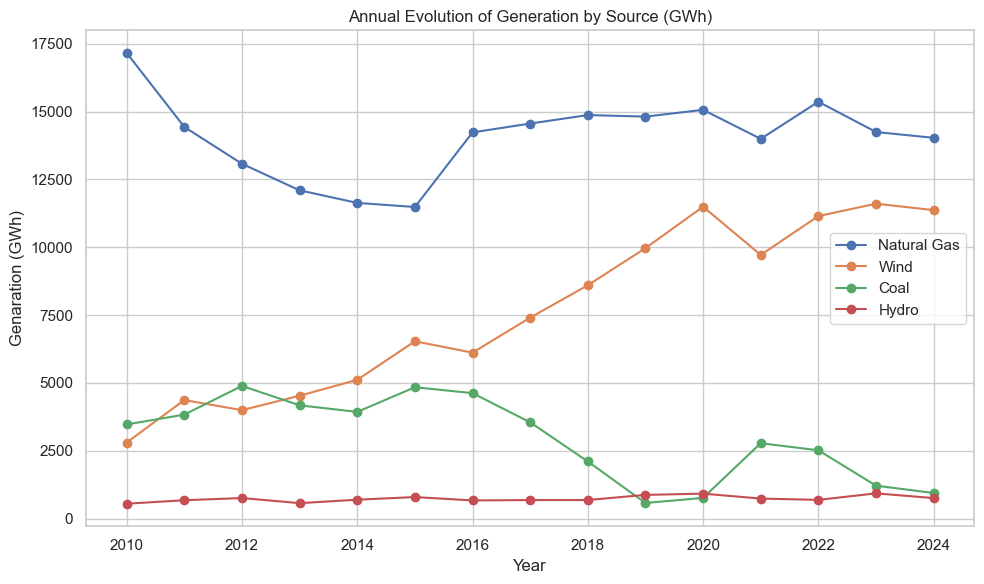

In [13]:
# 1. Line Chart - Evolution of 4 main sources by year
yearly = df.groupby("Year of Period")[["Natural Gas", "Wind", "Coal", "Hydro"]].sum()

plt.figure()
for col in yearly.columns:
    plt.plot(yearly.index, yearly[col], marker='o', label=col)
plt.title("Annual Evolution of Generation by Source (GWh)")
plt.xlabel("Year")
plt.ylabel("Genaration (GWh)")
plt.legend()
plt.tight_layout()
plt.show()

# Bar Chart: Average Generation by Source
**Objective:** Compare the average contribution of each energy source over the entire dataset period.  
Bar charts are useful for comparing discrete categories, making it easier to identify dominant sources.  
Natural gas and wind are the largest contributors, with peat, coal, and hydro following behind. Solar and waste contribute minimally.


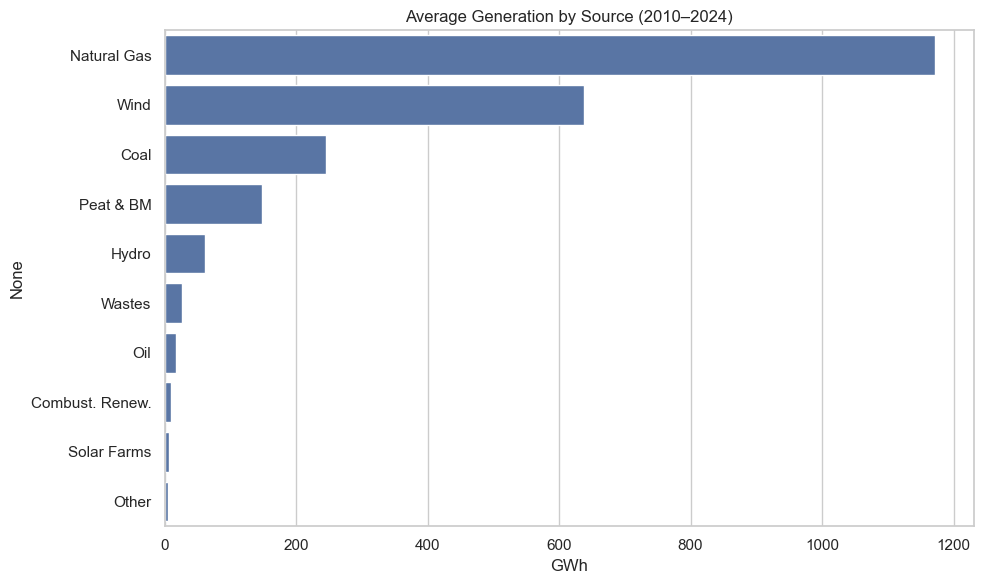

In [14]:
# 2. Bar Chart - Average Generation by Source
means = df.drop(columns=["Year of Period", "Month of Period", "Unit"]).mean().sort_values(ascending=False)

plt.figure()
sns.barplot(x=means.values, y=means.index)
plt.title("Average Generation by Source (2010–2024)")
plt.xlabel("GWh")
plt.tight_layout()
plt.show()

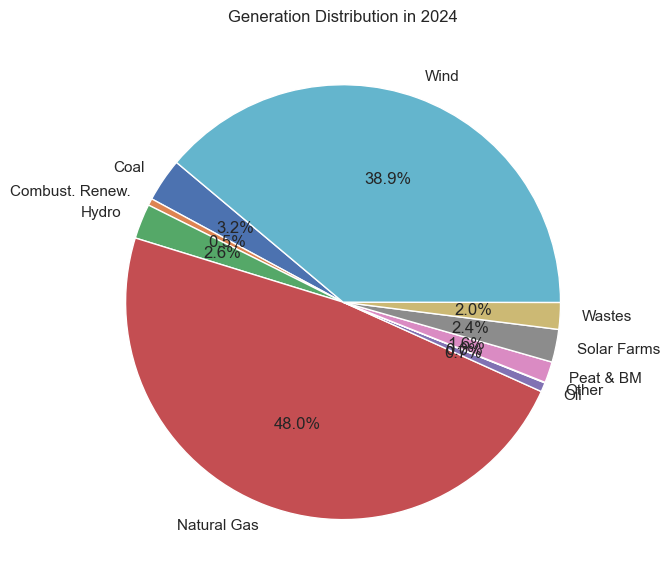

In [16]:
# 3. Pie Chart - Participation by Source in the most recent year
latest_year = df[df["Year of Period"] == df["Year of Period"].max()]
latest_total = latest_year.drop(columns=["Year of Period", "Month of Period", "Unit"]).sum()

plt.figure()
plt.pie(latest_total, labels=latest_total.index, autopct="%1.1f%%", startangle=140)
plt.title(f"Generation Distribution in {df['Year of Period'].max()}")
plt.tight_layout()
plt.show()

/var/folders/7_/62qxv59j79xbngphz62v7j3w0000gn/T/ipykernel_85372/683272964.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Month of Period"] + " " + df["Year of Period"].astype(str))


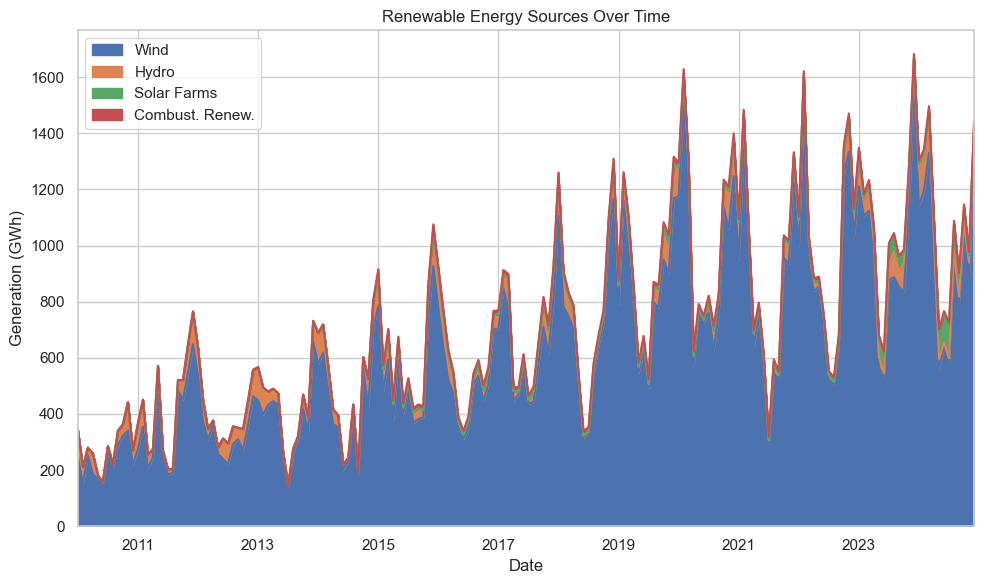

In [18]:
df["Date"] = pd.to_datetime(df["Month of Period"] + " " + df["Year of Period"].astype(str))
df_sorted = df.sort_values("Date")
renewables = df_sorted[["Date", "Wind", "Hydro", "Solar Farms", "Combust. Renew."]].set_index("Date")
renewables.plot.area()
plt.title("Renewable Energy Sources Over Time")
plt.ylabel("Generation (GWh)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()